In [48]:
# !pip install wordcloud
# !pip install stop_words
# !pip install spacy
# !python3 -m spacy download en_core_web_sm

In [12]:
# *** Allow printing for each command in Jupyter cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
# General
import pandas as pd 
import numpy as np # linear algebra
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import os # accessing directory structure

# NLP
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
import spacy

####Lemmatization
from nltk.stem import WordNetLemmatizer
# Lemmatize with POS Tag
from nltk.corpus import wordnet

In [46]:
spacy.__version__

'3.0.5'

In [27]:
# data/TABSA_dataset/all-data.csv
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('stopwords')
# !pip install lxml

In [19]:
def get_aspectTerms_or_aspectCategories(terms_or_categories):
    
    if terms_or_categories.tag == 'aspectTerms':
        terms = terms_or_categories
        if len(terms.getchildren()) > 0 :
            return terms.tag, [term.attrib for term in terms.getchildren()]
        else :
            return terms.tag, None
        
    if terms_or_categories.tag == 'aspectCategories':        
        cats = terms_or_categories
        if len(cats.getchildren()) > 0 :
            return cats.tag, [cat.attrib for cat in cats.getchildren()]
        else :
            return  cats.tag, None
    

### Read XML file and parse

In [21]:
from lxml import objectify

xml_data = objectify.parse('data/Restaurants_Train.xml')  # Parse XML data
root = xml_data.getroot()  # Root element
sentences = root.getchildren()

# Check the first sentence element
sentences[1].tag
sent_id = sentences[1].attrib['id'] 
sent_text = sentences[1].getchildren()[0]
if len(sentences[1].getchildren()) > 1:
    _type, _items = get_aspectTerms_or_aspectCategories(sentences[1].getchildren()[1])
    print (_type, _items, sep = ' : ')
if len(sentences[1].getchildren()) > 2:
    _type, _items = get_aspectTerms_or_aspectCategories(sentences[1].getchildren()[2])
    print (_type, _items, sep = ' : ')   
        

'sentence'

aspectTerms : [{'term': 'food', 'polarity': 'positive', 'from': '57', 'to': '61'}]
aspectCategories : [{'category': 'food', 'polarity': 'positive'}, {'category': 'anecdotes/miscellaneous', 'polarity': 'negative'}]


In [22]:
dictinary_list = []
for sentence in sentences[0:]:
    assert sentence.tag == 'sentence'
    sent_id = sentence.attrib['id'] 
    sent_text = sentence.getchildren()[0]

    dictionary_data = {'Sentence_Id': sent_id, 
                        'Texts': str(sent_text), 
                      }
    
    # 'AspectTerms': str(aspectTerms), 
    # 'AspectCategories': str(aspectCategories)
    
    if len(sentence.getchildren()) > 1:
        _type_1, _items_1 = get_aspectTerms_or_aspectCategories(sentence.getchildren()[1])        
        if _type_1 == 'aspectTerms' :
            dictionary_data['AspectTerms'] = str(_items_1)
        elif _type_1 == 'aspectCategories':
            dictionary_data['AspectCategories'] = str(_items_1)

            
    if len(sentence.getchildren()) > 2:
        _type_2, _items_2 = get_aspectTerms_or_aspectCategories(sentence.getchildren()[2])
        if _type_2 == 'aspectTerms' :
            dictionary_data['AspectTerms'] = str(_items_2)
        elif _type_2 == 'aspectCategories':
            dictionary_data['AspectCategories'] = str(_items_2)
            
    
    dictinary_list.append(dictionary_data)
    
    # print (sent_id, sent_text, dictionary_data['aspectTerms'] if 'aspectTerms' in dictionary_data else None , dictionary_data['aspectCategories'] if 'aspectCategories' in dictionary_data else None, sep='\n')
    # print()
    
data_df = pd.DataFrame.from_dict(dictinary_list)
data_df.head(10)

,Sentence_Id,Texts,AspectTerms,AspectCategories
0,3121,But the staff was so horrible to us.,"[{'term': 'staff', 'polarity': 'negative', 'fr...","[{'category': 'service', 'polarity': 'negative'}]"
1,2777,"To be completely fair, the only redeeming fact...","[{'term': 'food', 'polarity': 'positive', 'fro...","[{'category': 'food', 'polarity': 'positive'},..."
2,1634,"The food is uniformly exceptional, with a very...","[{'term': 'food', 'polarity': 'positive', 'fro...","[{'category': 'food', 'polarity': 'positive'}]"
3,2534,Where Gabriela personaly greets you and recomm...,NaN,"[{'category': 'service', 'polarity': 'positive'}]"
4,583,"For those that go once and don't enjoy it, all...",NaN,"[{'category': 'anecdotes/miscellaneous', 'pola..."
5,2846,"Not only was the food outstanding, but the lit...","[{'term': 'food', 'polarity': 'positive', 'fro...","[{'category': 'food', 'polarity': 'positive'},..."
6,1571,It is very overpriced and not very tasty.,NaN,"[{'category': 'food', 'polarity': 'negative'},..."
7,1458,Our agreed favorite is the orrechiete with sau...,[{'term': 'orrechiete with sausage and chicken...,"[{'category': 'food', 'polarity': 'positive'},..."
8,3161,The Bagels have an outstanding taste with a te...,"[{'term': 'Bagels', 'polarity': 'positive', 'f...","[{'category': 'food', 'polarity': 'positive'}]"
9,2391,Nevertheless the food itself is pretty good.,"[{'term': 'food', 'polarity': 'positive', 'fro...","[{'category': 'food', 'polarity': 'positive'}]"


In [23]:
# data_df.columns = ['Senti', 'Texts']

with pd.option_context('display.max_colwidth', -1):     
    display(data_df['Texts'][0:10])


0    But the staff was so horrible to us.                                                                                                                           
1    To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora.        
2    The food is uniformly exceptional, with a very capable kitchen which will proudly whip up whatever you feel like eating, whether it's on the menu or not.      
3    Where Gabriela personaly greets you and recommends you what to eat.                                                                                            
4    For those that go once and don't enjoy it, all I can say is that they just don't get it.                                                                       
5    Not only was the food outstanding, but the little 'perks' were great.                                                                                          
6    It is

### Find top X words which are getting used in the *Texts* of the reviews

In [24]:
top_N = 100 #top 100 words

#convert list of list into text
a = data_df['Texts'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

In [28]:
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

In [29]:
word_tokens = word_tokenize(b) # Tokenization
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [30]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

### Lemmatization
I am using Wordnet Lemmatizer with appropriate POS tag.
Function to map word with its POS tag

In [31]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

In [32]:
lemmatized_output = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in cleaned_data_title]
lemmatized_output = [word for word in lemmatized_output if not word.isnumeric()]


### Frequency distribution 

In [33]:
word_dist = nltk.FreqDist(lemmatized_output)
top100_words = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

<Figure size 360x360 with 0 Axes>

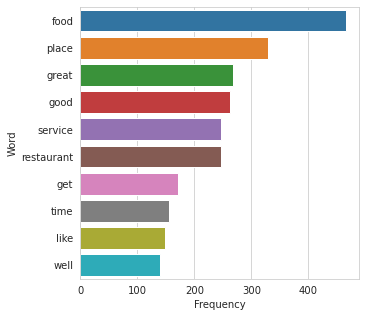

In [34]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

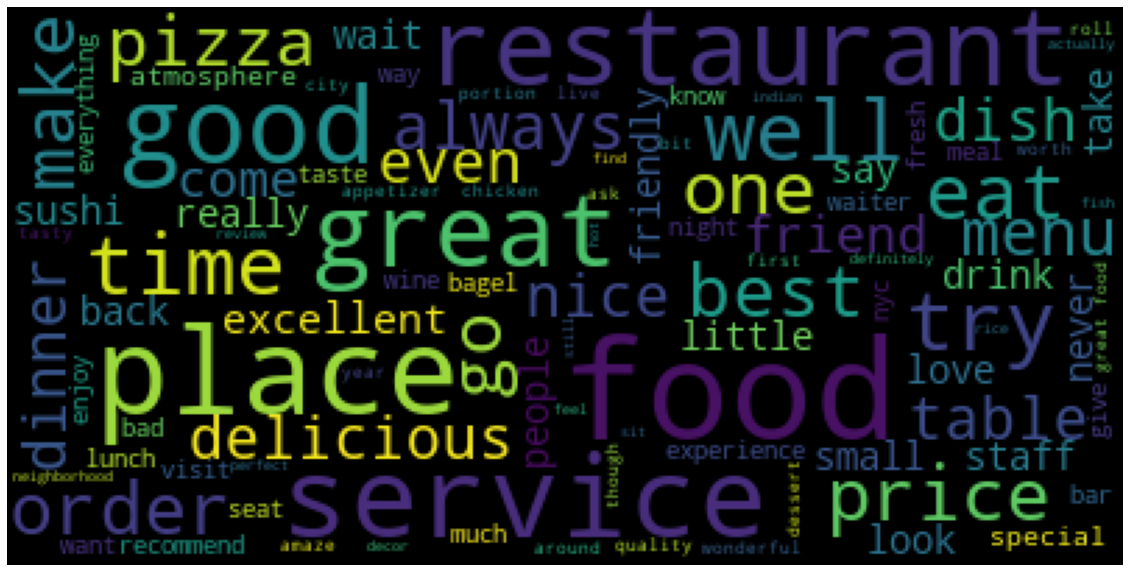

In [35]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (20,20))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

wc(lemmatized_output,'black','Common Words' )

### Find top X words which are getting used in the *Aspect-Terms* and *Aspect-Categories* of the reviews

In [36]:
# data_df.head()
with pd.option_context('display.max_colwidth', -1):     
    display(data_df[['AspectTerms', 'AspectCategories']][0:10])


,AspectTerms,AspectCategories
0,"[{'term': 'staff', 'polarity': 'negative', 'from': '8', 'to': '13'}]","[{'category': 'service', 'polarity': 'negative'}]"
1,"[{'term': 'food', 'polarity': 'positive', 'from': '57', 'to': '61'}]","[{'category': 'food', 'polarity': 'positive'}, {'category': 'anecdotes/miscellaneous', 'polarity': 'negative'}]"
2,"[{'term': 'food', 'polarity': 'positive', 'from': '4', 'to': '8'}, {'term': 'kitchen', 'polarity': 'positive', 'from': '55', 'to': '62'}, {'term': 'menu', 'polarity': 'neutral', 'from': '141', 'to': '145'}]","[{'category': 'food', 'polarity': 'positive'}]"
3,NaN,"[{'category': 'service', 'polarity': 'positive'}]"
4,NaN,"[{'category': 'anecdotes/miscellaneous', 'polarity': 'positive'}]"
5,"[{'term': 'food', 'polarity': 'positive', 'from': '17', 'to': '21'}, {'term': 'perks', 'polarity': 'positive', 'from': '51', 'to': '56'}]","[{'category': 'food', 'polarity': 'positive'}, {'category': 'service', 'polarity': 'positive'}]"
6,NaN,"[{'category': 'food', 'polarity': 'negative'}, {'category': 'price', 'polarity': 'negative'}]"
7,"[{'term': 'orrechiete with sausage and chicken', 'polarity': 'positive', 'from': '27', 'to': '62'}, {'term': 'waiters', 'polarity': 'positive', 'from': '76', 'to': '83'}, {'term': 'meats', 'polarity': 'neutral', 'from': '152', 'to': '157'}, {'term': 'dish', 'polarity': 'neutral', 'from': '113', 'to': '117'}]","[{'category': 'food', 'polarity': 'positive'}, {'category': 'service', 'polarity': 'positive'}]"
8,"[{'term': 'Bagels', 'polarity': 'positive', 'from': '4', 'to': '10'}]","[{'category': 'food', 'polarity': 'positive'}]"
9,"[{'term': 'food', 'polarity': 'positive', 'from': '17', 'to': '21'}]","[{'category': 'food', 'polarity': 'positive'}]"


#### All distinct words in Aspect-Categories

In [37]:
import ast 
data_df['AspCat'] = data_df['AspectCategories'].map(lambda x: ast.literal_eval(x))
data_df['AspCat'] = data_df['AspCat'].map(lambda x: [single_dict['category'] for single_dict in x]) # ' '.join([])
wlist = set()
data_df['AspCat'].map(lambda x: wlist.update(x))[0]
print('All distinct words in Aspect-Categories' + '\n' + '='*40)
wlist
# with pd.option_context('display.max_colwidth', -1):     
    # display(data_df['AspCat'][0:50])

All distinct words in Aspect-Categories


{'ambience', 'anecdotes/miscellaneous', 'food', 'price', 'service'}

#### All distinct words in Aspect-Terms

In [38]:
data_df['AspTrm'] = data_df['AspectTerms'].map(lambda x: [] if pd.isna(x) else ast.literal_eval(x))
data_df['AspTrm'] = data_df['AspTrm'].map(lambda x: [single_dict['term'] for single_dict in x]) # ' '.join([])
wlist = []
data_df['AspTrm'].map(lambda x: wlist.extend(x))[0]
# wlist
# with pd.option_context('display.max_colwidth', -1):     
    # display(data_df['AspCat'][0:50])

Distribution of words in Aspect-Terms


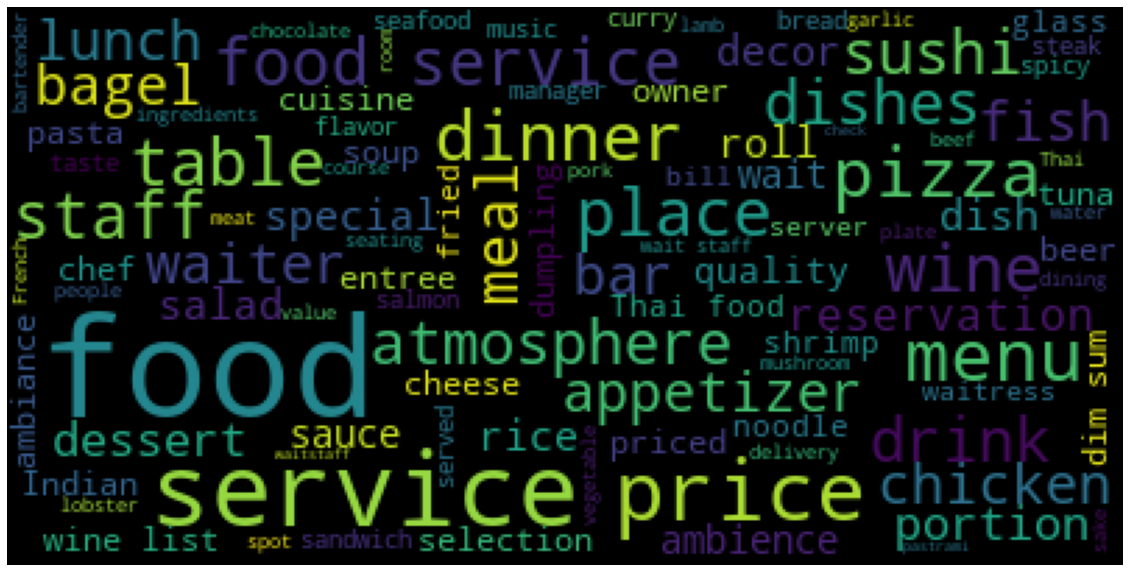

In [39]:
print('Distribution of words in Aspect-Terms' + '\n' + '='*34)

wc(wlist,'black','Common Words' )

## Prepare for LDA 

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.manifold import TSNE
import numpy as np


#### Process single document

In [41]:
data_df.head(5)
data_df['Texts'][0:5].tolist()

,Sentence_Id,Texts,AspectTerms,AspectCategories,AspCat,AspTrm
0,3121,But the staff was so horrible to us.,"[{'term': 'staff', 'polarity': 'negative', 'fr...","[{'category': 'service', 'polarity': 'negative'}]",[service],[staff]
1,2777,"To be completely fair, the only redeeming fact...","[{'term': 'food', 'polarity': 'positive', 'fro...","[{'category': 'food', 'polarity': 'positive'},...","[food, anecdotes/miscellaneous]",[food]
2,1634,"The food is uniformly exceptional, with a very...","[{'term': 'food', 'polarity': 'positive', 'fro...","[{'category': 'food', 'polarity': 'positive'}]",[food],"[food, kitchen, menu]"
3,2534,Where Gabriela personaly greets you and recomm...,NaN,"[{'category': 'service', 'polarity': 'positive'}]",[service],[]
4,583,"For those that go once and don't enjoy it, all...",NaN,"[{'category': 'anecdotes/miscellaneous', 'pola...",[anecdotes/miscellaneous],[]


['But the staff was so horrible to us.',
 "To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora.",
 "The food is uniformly exceptional, with a very capable kitchen which will proudly whip up whatever you feel like eating, whether it's on the menu or not.",
 'Where Gabriela personaly greets you and recommends you what to eat.',
 "For those that go once and don't enjoy it, all I can say is that they just don't get it."]

In [49]:
single_sent = data_df['Texts'][0:5].tolist()[2]
# single_sent
multi_sent = data_df['Texts'][0:5].tolist()
# multi_sent

# Load Spacy Model
nlp = spacy.load("en_core_web_sm")

# single_doc = nlp(single_sent)
single_doc = nlp(" ".join(multi_sent))

In [50]:
print("Unprocessed sentence:"+ "\n" + "="*20)
print(single_doc)

# Remove punctuations
# rp_doc = [t for t in multi_doc if t.dep_ == 'punct']
# token.orth_ to view the list but NOT for processing list  
# [token.orth_ for token in multi_doc if not token.is_punct | token.is_space] 

rp_doc = [token for token in single_doc if not token.is_punct | token.is_space] 
print("Punctuation cleaned:" + "\n" + "="*20)
print(rp_doc)

# Remove STOP_WORDS
from spacy.lang.en.stop_words import STOP_WORDS
rs_doc = [t for t in rp_doc if t.orth_.lower() not in STOP_WORDS]
print("Stop word cleaned:"+ "\n" + "="*20)
print(rs_doc) 

# Remove number
rn_doc = [t for t in rs_doc if t.pos_ != 'NUM']
print("Number cleaned:"+ "\n" + "="*20)
print(rn_doc)

processed_sent = " ".join([t.lemma_.lower() for t in rn_doc])
print("Processed sentence:"+ "\n" + "="*20)
print(processed_sent)

Unprocessed sentence:
But the staff was so horrible to us. To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora. The food is uniformly exceptional, with a very capable kitchen which will proudly whip up whatever you feel like eating, whether it's on the menu or not. Where Gabriela personaly greets you and recommends you what to eat. For those that go once and don't enjoy it, all I can say is that they just don't get it.
Punctuation cleaned:
[But, the, staff, was, so, horrible, to, us, To, be, completely, fair, the, only, redeeming, factor, was, the, food, which, was, above, average, but, could, n't, make, up, for, all, the, other, deficiencies, of, Teodora, The, food, is, uniformly, exceptional, with, a, very, capable, kitchen, which, will, proudly, whip, up, whatever, you, feel, like, eating, whether, it, 's, on, the, menu, or, not, Where, Gabriela, personaly, greets, you, and, recommends

#### Process multi document

In [51]:
def sentence_process(single_sent):
    single_doc = nlp(single_sent)
    # print("Unprocessed sentence:"+ "\n" + "="*20)
    # print(single_doc)

    # Remove punctuations
    # rp_doc = [t for t in multi_doc if t.dep_ == 'punct']
    # token.orth_ to view the list but NOT for processing list  
    # [token.orth_ for token in multi_doc if not token.is_punct | token.is_space] 

    rp_doc = [token for token in single_doc if not token.is_punct | token.is_space] 
    # print("Punctuation cleaned:" + "\n" + "="*20)
    # print(rp_doc)

    # Remove STOP_WORDS
    from spacy.lang.en.stop_words import STOP_WORDS
    rs_doc = [t for t in rp_doc if t.orth_.lower() not in STOP_WORDS]
    # print("Stop word cleaned:"+ "\n" + "="*20)
    # print(rs_doc) 

    # Remove number
    rn_doc = [t for t in rs_doc if t.pos_ != 'NUM']
    # print("Number cleaned:"+ "\n" + "="*20)
    # print(rn_doc)

    processed_sent = " ".join([t.lemma_.lower() for t in rn_doc])
    # print("Processed sentence:"+ "\n" + "="*20)
    # print(processed_sent)
    return processed_sent

# Test the function
sentence_process(" ".join(multi_sent))

'staff horrible completely fair redeem factor food average deficiency teodora food uniformly exceptional capable kitchen proudly whip feel like eat menu gabriela personaly greet recommend eat enjoy'

In [52]:
from tqdm import trange, tqdm

In [53]:
tqdm().pandas()
data_df['ProcessedTexts'] = data_df['Texts'].progress_apply(sentence_process) 

0it [00:00, ?it/s]
0it [00:00, ?it/s]/3044 [00:00<?, ?it/s]

100%|██████████| 3044/3044 [00:22<00:00, 135.39it/s]


### Count vectorize

In [54]:
vectorizer = CountVectorizer(min_df=5, max_df=0.95, lowercase=True)
data_vectorized = vectorizer.fit_transform(data_df['ProcessedTexts'])

print(f"Number if news items: {len(data_df['ProcessedTexts'])}")
print("Output Vector Shape: ", data_vectorized.shape)

Number if news items: 3044
Output Vector Shape:  (3044, 690)


In [55]:
print(f"Features for the vocabulary: {len(vectorizer.get_feature_names())}\n=", "= " * 15)
np.array(vectorizer.get_feature_names())

Features for the vocabulary: 690
= = = = = = = = = = = = = = = = 


array(['able', 'absolutely', 'accomodate', 'actually', 'add', 'addition',
       'affordable', 'afternoon', 'ago', 'agree', 'amazed', 'amazing',
       'ambiance', 'ambience', 'american', 'anniversary', 'appear',
       'appetizer', 'area', 'arrive', 'asian', 'ask', 'atmosphere',
       'attentive', 'attitude', 'authentic', 'available', 'ave', 'avenue',
       'average', 'avoid', 'away', 'awesome', 'awful', 'bad', 'bagel',
       'bar', 'barely', 'bartender', 'base', 'basil', 'beat', 'beautiful',
       'beef', 'beer', 'begin', 'believe', 'best', 'big', 'bill',
       'birthday', 'bistro', 'bit', 'bite', 'black', 'bland', 'block',
       'blue', 'bottle', 'boyfriend', 'bread', 'bring', 'brooklyn',
       'brunch', 'buck', 'buffet', 'bun', 'burger', 'burn', 'business',
       'busy', 'buy', 'cafe', 'cake', 'call', 'care', 'case', 'casual',
       'celebrate', 'certain', 'certainly', 'chance', 'change', 'charge',
       'cheap', 'check', 'cheese', 'chef', 'chicken', 'chinatown',
       '

In [56]:
print(f'Vocabulary count: {len(vectorizer.vocabulary_)}')
print ( '-- ' * 7)
print(vectorizer.vocabulary_)

Vocabulary count: 690
-- -- -- -- -- -- -- 
{'staff': 571, 'horrible': 271, 'completely': 108, 'fair': 194, 'food': 215, 'average': 29, 'kitchen': 311, 'feel': 203, 'like': 324, 'eat': 173, 'menu': 360, 'greet': 244, 'recommend': 481, 'enjoy': 176, 'outstanding': 406, 'little': 329, 'great': 242, 'overpriced': 409, 'tasty': 604, 'agree': 9, 'favorite': 201, 'chicken': 88, 'usually': 643, 'waiter': 655, 'kind': 310, 'split': 566, 'dish': 159, 'half': 251, 'meat': 355, 'taste': 603, 'terrific': 610, 'pretty': 455, 'good': 239, 'notice': 387, 'st': 570, 'traditional': 627, 'vietnamese': 650, 'black': 54, 'forget': 216, 'toast': 622, 'leave': 320, 'ingredient': 291, 'cheese': 86, 'hot': 274, 'cook': 113, 'plate': 438, 'touch': 625, 'take': 600, 'hour': 275, 'check': 85, 'perfect': 426, 'sit': 546, 'drink': 165, 'talk': 601, 'atmosphere': 22, 'visit': 653, 'cuisine': 128, 'definitely': 139, 'make': 346, 'regular': 485, 'neighborhood': 380, 'pizza': 433, 'thin': 614, 'girlfriend': 234, 'stum

In [57]:
# Our final vector:
print('Full vector: ')
print(data_vectorized.toarray())


Full vector: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [58]:
np.isnan(data_vectorized.toarray()).any()
np.isinf(data_vectorized.toarray()).any()

# [np.isnan(a).any() for a in  data_vectorized.toarray()]

False

False

### Implement LDA

In [59]:
NUM_TOPICS = 10

In [60]:
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [61]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [62]:
# Keywords for topics clustered by Latent Dirichlet Allocation
print("LDA Model: \n*", " * "*10)
selected_topics(lda, vectorizer)

LDA Model: 
*  *  *  *  *  *  *  *  *  *  * 
Topic 0:
[('food', 271.837387996601), ('great', 257.8568648226976), ('price', 115.7468103328916), ('good', 85.15627369932967), ('place', 81.22085799986428), ('well', 61.089184055506934), ('friend', 55.476170923269414), ('new', 46.48248373850061), ('get', 45.743632230583316), ('way', 32.84447136808771)]
Topic 1:
[('recommend', 83.9193546908071), ('place', 78.42270178988717), ('drink', 58.622430369797016), ('dish', 57.97919689406722), ('want', 46.864078516482095), ('think', 45.510941710877034), ('chicken', 43.922753327143404), ('bagel', 41.460798289214495), ('appetizer', 40.349739303378485), ('highly', 34.64578472417204)]
Topic 2:
[('sushi', 56.67458808050252), ('come', 55.59173320809852), ('menu', 51.42208059161849), ('good', 47.294537364316106), ('taste', 47.18908916910785), ('bar', 41.28773577556248), ('fish', 37.63526664178269), ('roll', 35.534991810447245), ('quality', 33.565202908953545), ('rice', 33.029949665707626)]
Topic 3:
[('restaur

### Visualizing LDA results with pyLDAvis

In [66]:
# !pip install pyLDAvis

In [67]:
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig


In [84]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
dash

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3      32.420952   8.115230       1        1  15.190395
4       0.648955  71.707100       2        1  13.916628
7      71.019684   9.971006       3        1  13.751715
1       3.785981  33.185135       4        1  13.147031
9     -42.666500  -9.222070       5        1   9.287496
2      -3.621689 -43.526516       6        1   8.416633
5      -3.632402  -4.171708       7        1   7.491099
0     -36.584400  35.804413       8        1   7.098121
6      44.391380  50.615383       9        1   6.049094
8      40.235809 -31.591665      10        1   5.651787, topic_info=          Term        Freq       Total Category  logprob  loglift
481  recommend   80.000000   80.000000  Default  30.0000  30.0000
619       time  117.000000  117.000000  Default  29.0000  29.0000
141  delicious   73.000000   73.000000  Default  28.0000  28.0000
533    service  180.000000  180.000000  Default  27.0000  27.0000
339       love   73.000000   73.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
173        eat   10.986505   94.032836  Topic10  -4.2478   0.7262
672       wine   10.338810   62.872656  Topic10  -4.3086   1.0680
242      great   11.091086  185.477447  Topic10  -4.2383   0.0564
324       like    9.776199  115.791211  Topic10  -4.3645   0.4014
238         go    9.367013   95.868066  Topic10  -4.4073   0.5474

[477 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1         4  0.893309  absolutely
3         2  0.270210    actually
3         5  0.675526    actually
4         2  0.817317         add
6         4  0.882144  affordable
...     ...       ...         ...
683       8  0.847568       write
684       3  0.915611       wrong
686       4  0.284472        year
686       9  0.682732        year
689       1  0.895178       yummy

[628 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 8, 2, 10, 3, 6, 1, 7, 9])

### TFIDF vectorize

In [72]:
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.95, lowercase=True)
tfidf_vectorized_data = tfidf_vectorizer.fit_transform(data_df['ProcessedTexts'])

print(f"Number if news items: {len(data_df['ProcessedTexts'])}")
print("Output Vector Shape: ", tfidf_vectorized_data.shape)

Number if news items: 3044
Output Vector Shape:  (3044, 690)


In [73]:
print(f"Features for the vocabulary: {len(tfidf_vectorizer.get_feature_names())}\n=", "= " * 15)
np.array(tfidf_vectorizer.get_feature_names())


Features for the vocabulary: 690
= = = = = = = = = = = = = = = = 


array(['able', 'absolutely', 'accomodate', 'actually', 'add', 'addition',
       'affordable', 'afternoon', 'ago', 'agree', 'amazed', 'amazing',
       'ambiance', 'ambience', 'american', 'anniversary', 'appear',
       'appetizer', 'area', 'arrive', 'asian', 'ask', 'atmosphere',
       'attentive', 'attitude', 'authentic', 'available', 'ave', 'avenue',
       'average', 'avoid', 'away', 'awesome', 'awful', 'bad', 'bagel',
       'bar', 'barely', 'bartender', 'base', 'basil', 'beat', 'beautiful',
       'beef', 'beer', 'begin', 'believe', 'best', 'big', 'bill',
       'birthday', 'bistro', 'bit', 'bite', 'black', 'bland', 'block',
       'blue', 'bottle', 'boyfriend', 'bread', 'bring', 'brooklyn',
       'brunch', 'buck', 'buffet', 'bun', 'burger', 'burn', 'business',
       'busy', 'buy', 'cafe', 'cake', 'call', 'care', 'case', 'casual',
       'celebrate', 'certain', 'certainly', 'chance', 'change', 'charge',
       'cheap', 'check', 'cheese', 'chef', 'chicken', 'chinatown',
       '

In [74]:
print(f'Vocabulary count: {len(tfidf_vectorizer.vocabulary_)}')
print ( '-- ' * 7)
print(tfidf_vectorizer.vocabulary_)

Vocabulary count: 690
-- -- -- -- -- -- -- 
{'staff': 571, 'horrible': 271, 'completely': 108, 'fair': 194, 'food': 215, 'average': 29, 'kitchen': 311, 'feel': 203, 'like': 324, 'eat': 173, 'menu': 360, 'greet': 244, 'recommend': 481, 'enjoy': 176, 'outstanding': 406, 'little': 329, 'great': 242, 'overpriced': 409, 'tasty': 604, 'agree': 9, 'favorite': 201, 'chicken': 88, 'usually': 643, 'waiter': 655, 'kind': 310, 'split': 566, 'dish': 159, 'half': 251, 'meat': 355, 'taste': 603, 'terrific': 610, 'pretty': 455, 'good': 239, 'notice': 387, 'st': 570, 'traditional': 627, 'vietnamese': 650, 'black': 54, 'forget': 216, 'toast': 622, 'leave': 320, 'ingredient': 291, 'cheese': 86, 'hot': 274, 'cook': 113, 'plate': 438, 'touch': 625, 'take': 600, 'hour': 275, 'check': 85, 'perfect': 426, 'sit': 546, 'drink': 165, 'talk': 601, 'atmosphere': 22, 'visit': 653, 'cuisine': 128, 'definitely': 139, 'make': 346, 'regular': 485, 'neighborhood': 380, 'pizza': 433, 'thin': 614, 'girlfriend': 234, 'stum

In [75]:
# Our final vector:
print('Full vector: ')
print(tfidf_vectorized_data.toarray())


Full vector: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [76]:
np.isnan(tfidf_vectorized_data.toarray()).any()
np.isinf(tfidf_vectorized_data.toarray()).any()

# [np.isnan(a).any() for a in  data_vectorized.toarray()]

False

False

### Implement LDA

In [77]:
NUM_TOPICS = 10

In [78]:
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(tfidf_vectorized_data)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [79]:
# Functions for printing keywords for each topic
def selected_topics(model, tfidf_vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(tfidf_vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [80]:
# Keywords for topics clustered by Latent Dirichlet Allocation
print("LDA Model: \n*", " * "*10)
selected_topics(lda, tfidf_vectorizer)

LDA Model: 
*  *  *  *  *  *  *  *  *  *  * 
Topic 0:
[('review', 16.083645358475323), ('people', 15.334743032463725), ('leave', 14.554744652854088), ('pretty', 13.847527121689637), ('selection', 10.332357330828003), ('huge', 9.731901266785698), ('spot', 9.118385895665032), ('expect', 9.03578933011272), ('plate', 8.380877381289347), ('experience', 8.285950456896)]
Topic 1:
[('food', 41.79133719568712), ('good', 38.43060076894671), ('price', 32.22922267101514), ('place', 24.946791444529715), ('visit', 21.3928294545192), ('bad', 21.10185715239684), ('sushi', 19.071963938199737), ('bagel', 18.059466103982146), ('tasty', 16.847213539434286), ('think', 15.200035038349071)]
Topic 2:
[('delicious', 35.153257268019885), ('love', 30.590692732447426), ('excellent', 26.46680720840019), ('pizza', 23.773727440184445), ('wine', 19.765073382782155), ('big', 13.82490776958951), ('salad', 13.556811484099072), ('list', 12.545880982934321), ('cheap', 12.501323610661826), ('food', 9.782670814673796)]
Topi

### Visualizing LDA results with pyLDAvis

In [81]:
# !pip install pyLDAvis

In [82]:
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig


In [86]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, tfidf_vectorized_data, tfidf_vectorizer, mds='tsne')
dash

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3      32.420952   8.115230       1        1  14.473477
7       0.648955  71.707100       2        1  12.857087
4      71.019684   9.971006       3        1  12.413867
1       3.785981  33.185135       4        1  11.934859
9     -42.666500  -9.222070       5        1   9.578122
2      -3.621689 -43.526516       6        1   8.834879
5      -3.632402  -4.171708       7        1   8.144500
0     -36.584400  35.804413       8        1   8.038433
6      44.391380  50.615383       9        1   7.003475
8      40.235809 -31.591665      10        1   6.721300, topic_info=          Term       Freq      Total Category  logprob  loglift
481  recommend  39.000000  39.000000  Default  30.0000  30.0000
619       time  50.000000  50.000000  Default  29.0000  29.0000
141  delicious  33.000000  33.000000  Default  28.0000  28.0000
533    service  73.000000  73.000000  Default  27.0000  27.0000
339       love  33.000000  33.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
173        eat   5.658659  40.218022  Topic10  -4.2478   0.7388
672       wine   5.325060  29.620287  Topic10  -4.3086   0.9839
242      great   5.712524  77.088031  Topic10  -4.2383   0.0976
324       like   5.035284  47.350674  Topic10  -4.3645   0.4588
238         go   4.824531  40.300174  Topic10  -4.4073   0.5772

[478 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1         4  0.838732  absolutely
3         3  0.235062    actually
3         5  0.705187    actually
4         3  0.913251         add
6         4  0.846635  affordable
...     ...       ...         ...
683       8  0.875312       write
684       2  0.916802       wrong
686       4  0.242952        year
686       9  0.728857        year
689       1  0.824523       yummy

[624 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 5, 2, 10, 3, 6, 1, 7, 9])

### Investigate LDA2VEC 
- https://www.datacamp.com/community/tutorials/lda2vec-topic-model
- https://multithreaded.stitchfix.com/blog/2016/05/27/lda2vec/#topic=38&lambda=1&term=


### Sentence BERT vectorize